In [9]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [10]:
n=100

In [11]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.0689,  1.0000],
        [ 0.2943,  1.0000],
        [ 0.5827,  1.0000],
        [-0.9991,  1.0000],
        [-0.3589,  1.0000]])

In [12]:
a = tensor(3.,2); a

tensor([3., 2.])

In [14]:
y = x@a + torch.rand(n) 
# '@' represents matrix multiplication. 
# x: 100x2
# a: 2x1
# n: 100x1, rand(n) generates floats in interval [0,1].

y

tensor([ 2.5500,  3.3737,  4.0975, -0.0608,  1.3956,  4.7691, -0.1881,  1.7111,
         1.0004,  0.6879,  4.7694,  2.4304,  3.1037,  2.4595,  2.7936,  3.4769,
         0.6174,  2.7632,  5.2201,  3.3025,  0.7296,  1.4254,  5.5422,  5.4039,
         3.0736, -0.1736,  4.2328,  4.0618,  0.0540,  4.9224,  0.6182,  3.1610,
         1.7280,  4.6932,  1.7470,  0.4963, -0.2111,  2.5272,  3.9673,  5.0127,
         2.1611,  3.6201, -0.2863,  2.7088,  4.7769,  2.6834,  0.6455,  2.9490,
         2.0217,  3.7111,  3.7343,  1.8124,  4.5359,  3.3245,  3.5415, -0.7522,
         2.7930,  5.4493,  1.1016,  0.6860,  2.1693,  0.2646,  1.1873,  0.7764,
         5.2909,  3.5204,  3.7683,  4.2285,  2.6697, -0.5154,  2.6644, -0.1070,
         4.9210,  3.4459,  0.7099,  3.7036,  1.5572,  0.7260,  1.8594, -0.2635,
         0.6647,  2.1723,  4.7157,  1.9426,  0.1815,  0.3771,  3.2592,  4.3871,
         4.7910,  1.5766,  3.9854,  0.0367,  5.6678,  3.9321,  5.5724, -0.0447,
         4.5104,  0.3509,  2.9736,  3.80

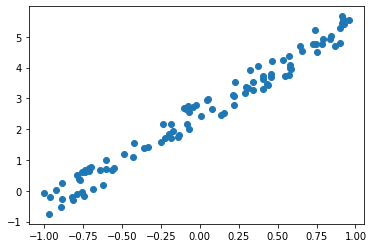

In [15]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [17]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [19]:
a = tensor(-1.,1) # initial guess (randomised weights)

In [23]:
y_hat = x@a # prediction tensor

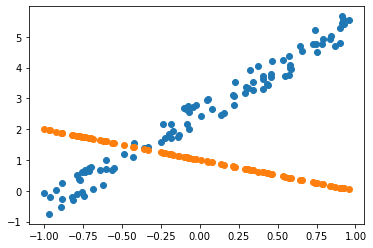

In [24]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [25]:
mse(y_hat, y) # loss value (aggregate of prediction and target tensor)

tensor(7.8904)

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

The most basic form is `weight = weight - lr * gradient(loss)`, where `gradient(loss)` is `dloss`/`dweight`.

Recall loss function is parametrised by the weights. So when find gradient, is the derivative w.r.t the weights.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [26]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [27]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [28]:
lr = 1e-1
for t in range(100): update()

tensor(7.8904, grad_fn=<MeanBackward0>)
tensor(1.3864, grad_fn=<MeanBackward0>)
tensor(0.3788, grad_fn=<MeanBackward0>)
tensor(0.1493, grad_fn=<MeanBackward0>)
tensor(0.0958, grad_fn=<MeanBackward0>)
tensor(0.0833, grad_fn=<MeanBackward0>)
tensor(0.0804, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)


In [ ]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

## Animate it!

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.